# Support Vector Classififcation - Here we predict the quality of wine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# print particular column
data.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [4]:
# we have multi-class classification problem as the y variable "Quality of wine" has 6 diff qualities listed.
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#if max and min value of total sulphur dioxide is 6 and 289 very large difference.(might have outliers)
data.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# EDA

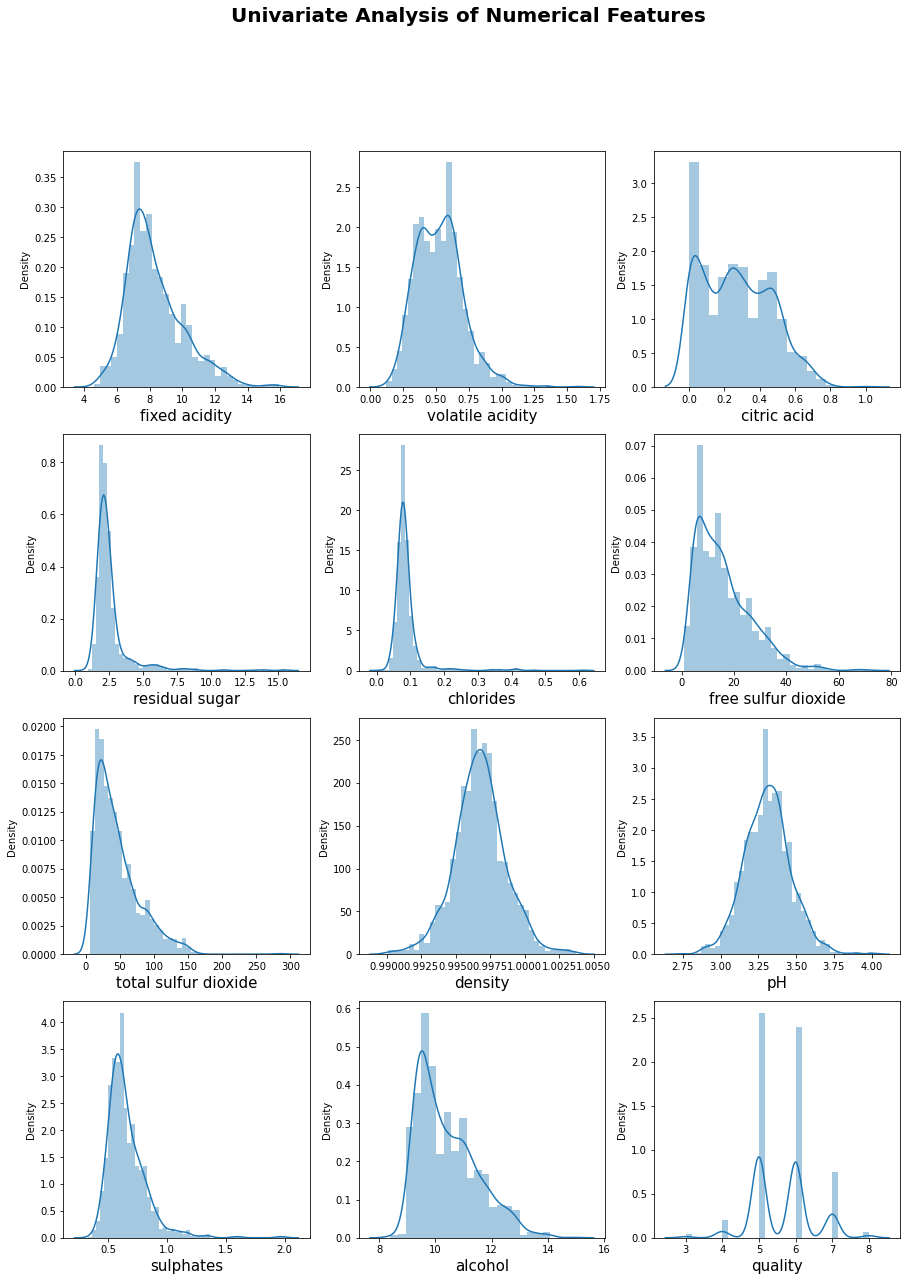

In [8]:
plt.figure(figsize=(15,20), facecolor='white')
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold')
plotnumber = 1

for column in data:
    if plotnumber<=12 : # 12 columns not considering date column
        ax = plt.subplot(4,3,plotnumber)  # 4 rows, 3 columns
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1

plt.show()

<AxesSubplot:xlabel='free sulfur dioxide'>

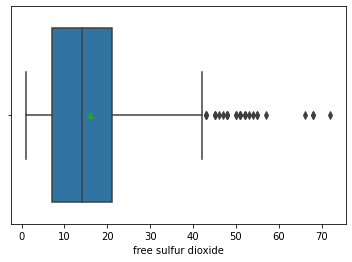

In [9]:
sns.boxplot(x='free sulfur dioxide',data= data,showmeans=True)

<AxesSubplot:xlabel='total sulfur dioxide'>

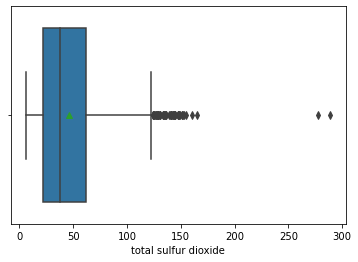

In [10]:
sns.boxplot(x='total sulfur dioxide',data= data,showmeans=True)

In [11]:
q = data['free sulfur dioxide'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['free sulfur dioxide']<q]

q = data_cleaned['total sulfur dioxide'].quantile(0.96)
# we are removing the top 4% data from the total sulfur dioxide column
data_cleaned  = data_cleaned[data_cleaned['total sulfur dioxide']<q]


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

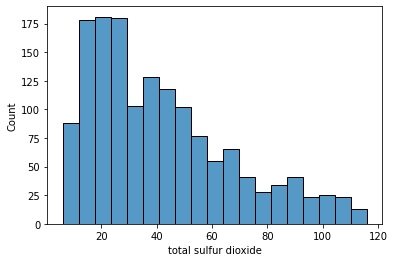

In [12]:
sns.histplot(x='total sulfur dioxide',data= data_cleaned)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

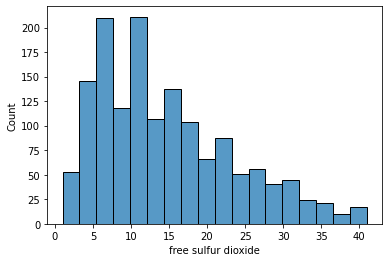

In [13]:
sns.histplot(x='free sulfur dioxide',data= data_cleaned)

In [14]:
data_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:title={'center':'Correlation with quality'}>

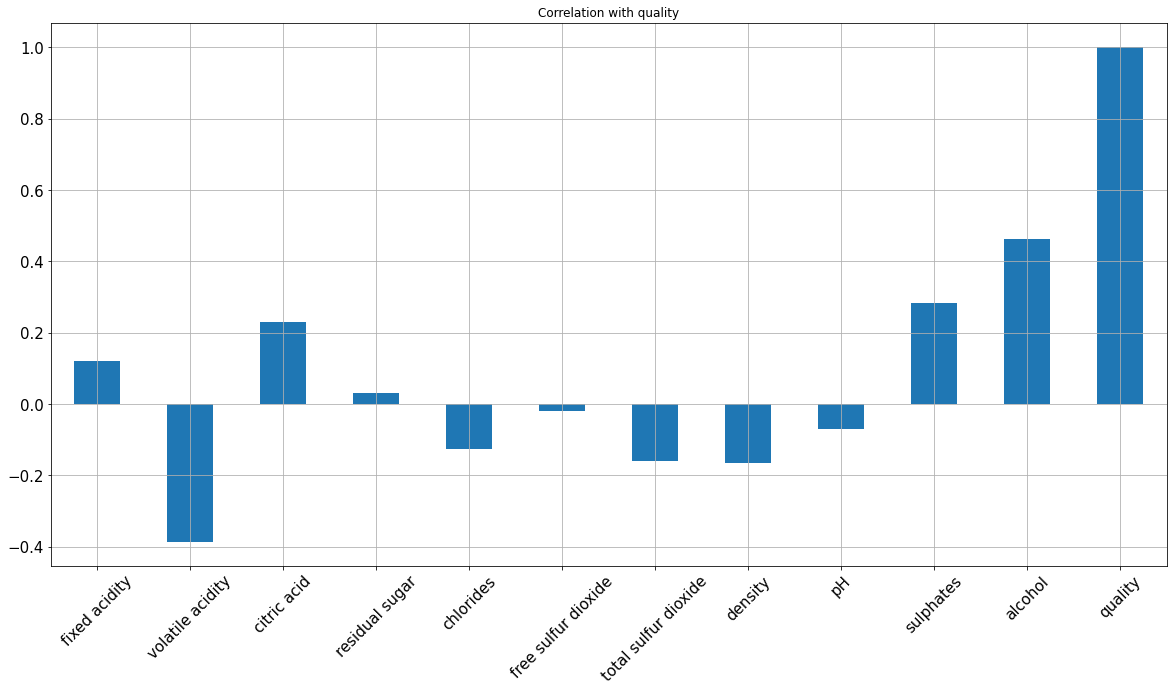

In [53]:
#Correlation with Quality with respect to attributes
data_cleaned.corrwith(data_cleaned.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)


# TRAIN TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = data_cleaned.drop(['quality'],axis=1)
y = data_cleaned['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# STANDARD SCALER

In [20]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler

StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
x_train   

array([[-0.63802455,  0.08579461, -0.01637034, ...,  0.51677802,
         0.35103362,  0.51029996],
       [ 0.59915671, -0.68682268,  0.99188263, ..., -1.04694944,
        -0.96632359,  0.0426901 ],
       [-0.80673109, -0.68682268, -0.16760829, ..., -0.33024102,
        -0.46447323, -0.42491976],
       ...,
       [ 0.03680159, -0.90757048,  0.2356929 , ..., -0.06961978,
         0.41376491,  0.51029996],
       [-0.69426006,  0.80322494, -1.37751186, ...,  0.84255457,
        -0.71539841, -0.98605159],
       [-0.24437597, -1.01794437,  0.43734349, ..., -0.26508571,
        -0.71539841,  0.69734391]])

In [22]:
x_test = scaler.transform(x_test)
x_test

array([[-0.4130825 , -0.07976624, -0.62132213, ..., -0.91663882,
        -0.15081675, -0.23787581],
       [-0.97543762,  1.8241835 , -1.27668656, ...,  1.49410768,
        -0.33901064,  0.51029996],
       [ 0.76786325,  0.03060766,  1.64724706, ..., -0.06961978,
         1.29200305,  1.81960757],
       ...,
       [-0.01943392, -1.45943997,  0.73981939, ..., -0.65601757,
         0.91561528, -0.98605159],
       [ 0.88033427, -0.96275742,  0.68940674, ..., -0.65601757,
        -0.96632359, -0.89252962],
       [-0.46931802,  0.25135545, -1.27668656, ...,  0.32131209,
        -0.21354805,  0.32325602]])

In [23]:
x_train.shape

(1007, 11)

In [24]:
y_train.shape

(1007,)

In [42]:
y_test.value_counts()

6    213
5    202
7     60
4     14
3      6
8      1
Name: quality, dtype: int64

In [25]:
x_test.shape

(496, 11)

In [26]:
y_test.shape

(496,)

In [27]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# SVC MODEL

In [28]:
from sklearn.svm import SVC


In [29]:
model = SVC(probability = True)
model

SVC(probability=True)

In [30]:
model.fit(x_train,y_train)

SVC(probability=True)

In [31]:
# to store our result for comparison at the end
i_Report =[]

In [32]:
test_score = model.score(x_test, y_test)
pred = model.predict(x_test)
print(confusion_matrix(y_test,pred))
print (classification_report(y_test,pred))
p,r,f,s = precision_recall_fscore_support(y_test,pred, average='macro')

z = model.predict_proba(x_test)
roc =roc_auc_score(y_test, z ,multi_class ='ovr')

print(f'1. Test score: {test_score}\n2. ROC: {roc}:')
i_Report.append(['SVC Classifier',p,r,f,test_score,roc])

[[  0   0   4   2   0   0]
 [  0   0  10   3   1   0]
 [  0   0 146  55   1   0]
 [  0   0  60 143  10   0]
 [  0   0   3  35  22   0]
 [  0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        14
           5       0.65      0.72      0.69       202
           6       0.60      0.67      0.63       213
           7       0.65      0.37      0.47        60
           8       0.00      0.00      0.00         1

    accuracy                           0.63       496
   macro avg       0.32      0.29      0.30       496
weighted avg       0.60      0.63      0.61       496

1. Test score: 0.6270161290322581
2. ROC: 0.8264423646926349:


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model2 = LogisticRegression()
model2

LogisticRegression()

In [35]:
model2.fit(x_train,y_train)

LogisticRegression()

In [36]:
test_score = model2.score(x_test, y_test)
log_test_pred = model2.predict(x_test)
print(confusion_matrix(y_test, log_test_pred))
print (classification_report(y_test,log_test_pred))
p,r,f,s = precision_recall_fscore_support(y_test, log_test_pred, average='macro')

k = model2.predict_proba(x_test)
roc =roc_auc_score(y_test,k,multi_class = "ovr")

print(f'1. Test score: {test_score}\n2. ROC: {roc}:')
i_Report.append(['Logistic Regression',p,r,f,test_score,roc])

[[  0   0   5   1   0   0]
 [  0   1  10   2   1   0]
 [  1   1 146  54   0   0]
 [  0   0  66 136  11   0]
 [  0   0   3  36  21   0]
 [  0   0   0   0   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.07      0.12        14
           5       0.63      0.72      0.68       202
           6       0.59      0.64      0.62       213
           7       0.62      0.35      0.45        60
           8       0.00      0.00      0.00         1

    accuracy                           0.61       496
   macro avg       0.39      0.30      0.31       496
weighted avg       0.60      0.61      0.60       496

1. Test score: 0.6129032258064516
2. ROC: 0.7899648065323067:


In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# SVC With Grid Search CV

In [38]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'C':[1,10,100],'gamma':[1,0.1,], 'kernel':['linear','rbf']}

grid = GridSearchCV(estimator = SVC(probability=True),
                           param_grid=param_grid,
                           cv=kfold,
                           refit = True,
                           verbose=3)
                    

grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.569 total time=   0.2s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.545 total time=   0.2s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.572 total time=   0.2s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.547 total time=   0.2s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.532 total time=   0.2s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.574 total time=   0.6s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.614 total time=   0.6s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.662 total time=   0.6s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.647 total time=   0.6s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   0.6s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.569 total time=   0.2s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [39]:
cv_score = grid.best_score_
test_score = grid.score(x_test, y_test)
g_pred = grid.predict(x_test)
cm = confusion_matrix(y_test, g_pred)
print(cm)
print (classification_report(y_test,g_pred))
p,r,f,s = precision_recall_fscore_support(y_test, g_pred, average='macro')

w = grid.predict_proba(x_test)
roc =roc_auc_score(y_test, w ,multi_class ='ovr')

print(f'1. Test score: {test_score}\n2. ROC: {roc}\n3. Cross Val score:{cv_score}:')
i_Report.append(['SVC Classifier Hypertuned',p,r,f,test_score,roc])

[[  0   0   2   4   0   0]
 [  0   0   3  11   0   0]
 [  0   0 113  89   0   0]
 [  0   0  37 170   6   0]
 [  0   0   3  33  23   1]
 [  0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        14
           5       0.72      0.56      0.63       202
           6       0.55      0.80      0.65       213
           7       0.79      0.38      0.52        60
           8       0.00      0.00      0.00         1

    accuracy                           0.62       496
   macro avg       0.34      0.29      0.30       496
weighted avg       0.62      0.62      0.60       496

1. Test score: 0.6169354838709677
2. ROC: 0.7916709433841169
3. Cross Val score:0.6256834638687749:


Text(0.5, 42.0, 'Predicted Values')

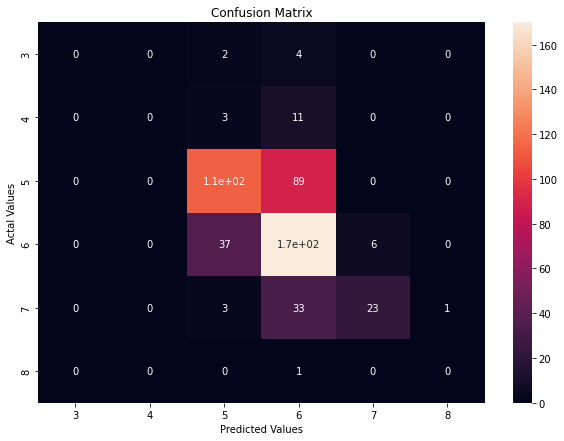

In [52]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = [3,4,5,6,7,8], 
                     columns = [3,4,5,6,7,8])


plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

In [ ]:
# wine quality was bad but it was predicted to be good - bad taste/lose consumers - precision
# wine quality was good but it was predicted to be bad - for recheck - recall

In [41]:
i_Report = pd.DataFrame(i_Report,columns=['Classifier','Macro Precision',
                                         'Macro Recall','Macro F1','Test Accuracy','ROC'])
i_Report

,Classifier,Macro Precision,Macro Recall,Macro F1,Test Accuracy,ROC
0,SVC Classifier,0.316682,0.293467,0.297981,0.627016,0.826442
1,Logistic Regression,0.391053,0.297116,0.310520,0.612903,0.789965
2,SVC Classifier Hypertuned,0.343374,0.290144,0.299537,0.616935,0.791671
